In [133]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

Load, process, and clean data

In [2]:
# Load data from CSV files into data frames with Pandas
# DepMap RNA-seq data in units of TPM (log2)
gdsc_pyr = pd.read_csv('GDSC_PYR.csv') #GDSC pyrimethamine sensitivity data
ung = pd.read_csv('UNG_19Q3.csv') #DepMap RNA-seq data for UNG
tmem173 = pd.read_csv('TMEM173_19Q3.csv') #DepMap RNA-seq data for TMEM173/STING
stat3 = pd.read_csv('STAT3_19Q3.csv') #DepMap RNA-seq data for STAT3
socs3 = pd.read_csv('SOCS3_19Q3.csv') #DepMap RNA-seq data for SOCS3
smarcc2 = pd.read_csv('SMARCC2_19Q3.csv') #DepMap RNA-seq data for SMARCC2
smarcc1 = pd.read_csv('SMARCC1_19Q3.csv') #DepMap RNA-seq data for SMARCC1
smarca4 = pd.read_csv('SMARCA4_19Q3.csv') #DepMap RNA-seq data for SMARCA4/BRG1
slc19a1 = pd.read_csv('SLC19A1_19Q3.csv') #DepMap RNA-seq data for SLC19A1
cxcl10 = pd.read_csv('CXCL10_19Q3.csv') #DepMap RNA-seq data for CXCL10
bcl6 = pd.read_csv('BCL6_19Q3.csv') #DepMap RNA-seq data for BCL6
apex1 = pd.read_csv('APEX1_19Q3.csv') #DepMap RNA-seq data for APEX1
dhfr = pd.read_csv('DHFR_19Q3.csv') #DepMap RNA-seq data for DHFR

In [3]:
# Make a list of RNA-seq data frames
df_list = [
    ung,
    tmem173,
    stat3,
    socs3,
    smarcc2,
    smarcc1,
    smarca4,
    slc19a1,
    cxcl10,
    bcl6,
    apex1,
    dhfr
]

# Rename TPM (log2) column to gene name
# Try to use for loop to do this!!!
ung.rename(columns={'TPM (log2)': 'UNG'}, inplace=True)
tmem173.rename(columns={'TPM (log2)': 'TMEM173'}, inplace=True)
stat3.rename(columns={'TPM (log2)': 'STAT3'}, inplace=True)
socs3.rename(columns={'TPM (log2)': 'SOCS3'}, inplace=True)
smarcc2.rename(columns={'TPM (log2)': 'SMARCC2'}, inplace=True)
smarcc1.rename(columns={'TPM (log2)': 'SMARCC1'}, inplace=True)
smarca4.rename(columns={'TPM (log2)': 'SMARCA4'}, inplace=True)
slc19a1.rename(columns={'TPM (log2)': 'SLC19A1'}, inplace=True)
cxcl10.rename(columns={'TPM (log2)': 'CXCL10'}, inplace=True)
bcl6.rename(columns={'TPM (log2)': 'BCL6'}, inplace=True)
apex1.rename(columns={'TPM (log2)': 'APEX1'}, inplace=True)
dhfr.rename(columns={'TPM (log2)': 'DHFR'}, inplace=True)

# Rename Primary Disease column to Cancer Type for ung data frame only
ung.rename(columns={'Primary Disease': 'Cancer Type'}, inplace=True)

# Delete DepMap ID and Lineage columns from RNA-seq data frames
for df in df_list:
    df.drop('DepMap ID', axis=1, inplace=True)
    df.drop('Lineage', axis=1, inplace=True)

In [4]:
# Delete TCGA classification, Tissue, and Tissue sub-type columns from gdsc_pyr data frame
gdsc_pyr.drop('TCGA classification', axis=1, inplace=True)
gdsc_pyr.drop('Tissue', axis=1, inplace=True)
gdsc_pyr.drop('Tissue sub-type', axis=1, inplace=True)

# Remove '-' from cell line names and force to uppercase
gdsc_pyr['Cell line'] = gdsc_pyr['Cell line'].str.replace('-', '').str.upper()

In [5]:
# Merge gdsc_pyr with RNA-seq data frames
# Try to use for loop to do this!!!
temp_merge = pd.merge(left=gdsc_pyr, right=ung, left_on='Cell line', right_on='Cell Line Name', how='inner')
temp_merge = pd.merge(left=temp_merge, right=tmem173, left_on='Cell line', right_on='Cell Line Name', how='inner')
temp_merge = pd.merge(left=temp_merge, right=stat3, left_on='Cell line', right_on='Cell Line Name', how='inner')
temp_merge = pd.merge(left=temp_merge, right=socs3, left_on='Cell line', right_on='Cell Line Name', how='inner')
temp_merge = pd.merge(left=temp_merge, right=smarcc2, left_on='Cell line', right_on='Cell Line Name', how='inner')
temp_merge = pd.merge(left=temp_merge, right=smarcc1, left_on='Cell line', right_on='Cell Line Name', how='inner')
temp_merge = pd.merge(left=temp_merge, right=smarca4, left_on='Cell line', right_on='Cell Line Name', how='inner')
temp_merge = pd.merge(left=temp_merge, right=slc19a1, left_on='Cell line', right_on='Cell Line Name', how='inner')
temp_merge = pd.merge(left=temp_merge, right=cxcl10, left_on='Cell line', right_on='Cell Line Name', how='inner')
temp_merge = pd.merge(left=temp_merge, right=bcl6, left_on='Cell line', right_on='Cell Line Name', how='inner')
temp_merge = pd.merge(left=temp_merge, right=apex1, left_on='Cell line', right_on='Cell Line Name', how='inner')
final = pd.merge(left=temp_merge, right=dhfr, left_on='Cell line', right_on='Cell Line Name', how='inner')

In [6]:
# Remove duplicate columns from final data frame
to_drop = []
for column in final:
    if column.endswith('_y') or column.endswith('_x'):
        to_drop.append(column)

final = final.drop(to_drop, axis=1, inplace=False)
    
# Remove Cancer Type column from final data frame
final = final.drop('Cancer Type', axis=1, inplace=False)

In [7]:
# Add Log2 IC50 column to final data frame
final['Log2 IC50'] = np.log2(final['IC50'])

# Reorder columns in final data frame
final = final.reindex(columns=[
    'Cell line',
    'Primary Disease',
    'IC50',
    'Log2 IC50',
    'AUC',
    'APEX1', 
    'BCL6',
    'CXCL10',
    'DHFR',
    'SLC19A1',
    'SMARCA4',
    'SMARCC1',
    'SMARCC2',
    'SOCS3',
    'STAT3',
    'TMEM173',
    'UNG']
)

# Remove cell lines with IC50 values greater than 20 uM from final data frame
# 20 uM was the max screening concentration
final = final[final['IC50'] <= 20]

1. What is the relationship between IC50 and AUC? How does this relationship change with increasing IC50 values?

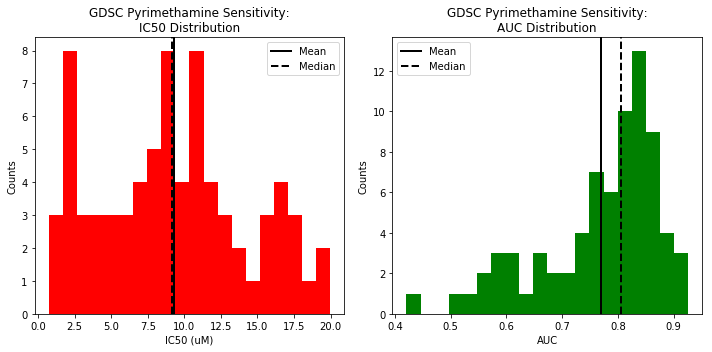

In [134]:
# Define figure dimensions
plt.figure(figsize=(10, 5))

# Define subplots and look at distribution of IC50 and AUC
plt.subplot(1, 2, 1)
plt.hist(final['IC50'], bins=20, color='red')
plt.axvline(final['IC50'].mean(), color='black', linestyle='solid', linewidth=2, label='Mean')
plt.axvline(final['IC50'].median(), color='black', linestyle='dashed', linewidth=2, label='Median')
plt.title('GDSC Pyrimethamine Sensitivity:\nIC50 Distribution')
plt.xlabel('IC50 (uM)')
plt.ylabel('Counts')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(final['AUC'], bins=20, color='green')
plt.axvline(final['AUC'].mean(), color='black', linestyle='solid', linewidth=2, label='Mean')
plt.axvline(final['AUC'].median(), color='black', linestyle='dashed', linewidth=2, label='Median')
plt.title('GDSC Pyrimethamine Sensitivity:\nAUC Distribution')
plt.xlabel('AUC')
plt.ylabel('Counts')
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

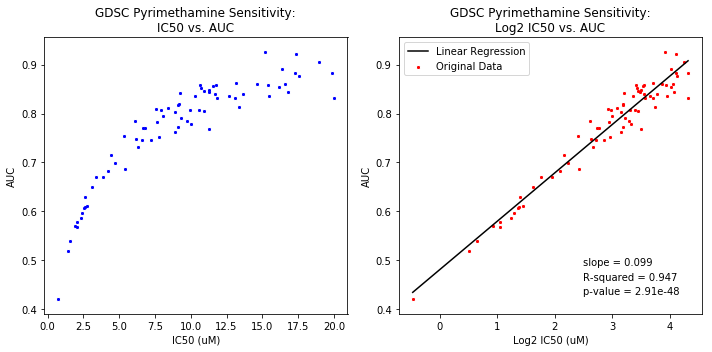

In [135]:
# Define figure dimensions
plt.figure(figsize=(10, 5))

# Define subplots and look at relationship between IC50 and AUC
plt.subplot(1, 2, 1)
plt.scatter(
    x=final['IC50'],
    y=final['AUC'],
    color='blue',
    marker='x', s=5
)
plt.title('GDSC Pyrimethamine Sensitivity:\nIC50 vs. AUC')
plt.xlabel('IC50 (uM)')
plt.ylabel('AUC')

plt.subplot(1, 2, 2)
plt.scatter(
    x=final['Log2 IC50'],
    y=final['AUC'],
    color='red',
    marker='x', s=5,
    label='Original Data'
)
plt.title('GDSC Pyrimethamine Sensitivity:\nLog2 IC50 vs. AUC')
plt.xlabel('Log2 IC50 (uM)')
plt.ylabel('AUC')

# Add best fit line, R-squared, and p-value for linear regression to Log2 IC50 vs. AUC plot
slope, intercept, r_value, p_value, st_err = stats.linregress(final['Log2 IC50'], final['AUC'])
r_square = r_value ** 2
line = slope * final['Log2 IC50'] + intercept
plt.plot(final['Log2 IC50'], line, '-', color='black', label='Linear Regression')
plt.legend()
plt.text(2.5, 0.49, 'slope = ' + str(round(slope, 3)))
plt.text(2.5, 0.46, 'R-squared = ' + str(round(r_square, 3)))
plt.text(2.5, 0.43, 'p-value = ' + format(p_value, '.2e'))

# Show subplots
plt.tight_layout()
plt.show()

In [10]:
# Use conditionals to create pyrimethamine sensitive and resistant data frames
pyr_sensitive = final[final['IC50'] <= 5]
pyr_intermediate = final[(final['IC50'] > 5) & (final['IC50'] <= 15)]
pyr_resistant = final[final['IC50'] > 15]

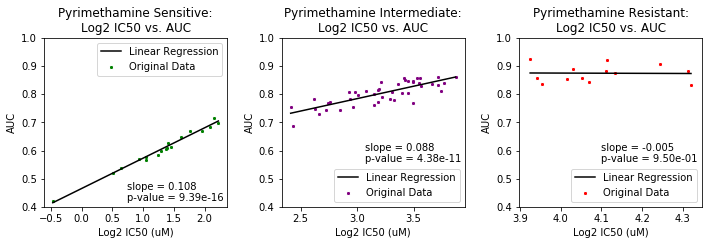

In [132]:
# Define figure dimensions
plt.figure(figsize=(10, 6))

# Define subplots and look at relationship between Log2 IC50 and AUC
plt.subplot(2, 3, 1)
plt.scatter(
    x=pyr_sensitive['Log2 IC50'],
    y=pyr_sensitive['AUC'],
    color='green',
    marker='x', s=5,
    label='Original Data'
)
plt.title('Pyrimethamine Sensitive:\nLog2 IC50 vs. AUC')
plt.xlabel('Log2 IC50 (uM)')
plt.ylabel('AUC')
plt.ylim(0.4, 1)

# Add best fit line and slope to pyr_sensitive plot
slope, intercept, r_value, p_value, st_err = stats.linregress(pyr_sensitive['Log2 IC50'], pyr_sensitive['AUC'])
line = slope * pyr_sensitive['Log2 IC50'] + intercept
plt.plot(pyr_sensitive['Log2 IC50'], line, '-', color='black', label='Linear Regression')
plt.legend()
plt.text(0.73, 0.46, 'slope = ' + str(round(slope, 3)))
plt.text(0.73, 0.42, 'p-value = ' + format(p_value, '.2e'))

plt.subplot(2, 3, 2)
plt.scatter(
    x=pyr_intermediate['Log2 IC50'],
    y=pyr_intermediate['AUC'],
    color='purple',
    marker='x', s=5,
    label='Original Data'
)
plt.title('Pyrimethamine Intermediate:\nLog2 IC50 vs. AUC')
plt.xlabel('Log2 IC50 (uM)')
plt.ylabel('AUC')
plt.ylim(0.4, 1)

# Add best fit line and slope to pyr_intermediate plot
slope, intercept, r_value, p_value, st_err = stats.linregress(pyr_intermediate['Log2 IC50'], pyr_intermediate['AUC'])
line = slope * pyr_intermediate['Log2 IC50'] + intercept
plt.plot(pyr_intermediate['Log2 IC50'], line, '-', color='black', label='Linear Regression')
plt.legend(loc='lower right')
plt.text(3.07, 0.6, 'slope = ' + str(round(slope, 3)))
plt.text(3.07, 0.56, 'p-value = ' + format(p_value, '.2e'))

plt.subplot(2, 3, 3)
plt.scatter(
    x=pyr_resistant['Log2 IC50'],
    y=pyr_resistant['AUC'],
    color='red',
    marker='x', s=5,
    label='Original Data'
)
plt.title('Pyrimethamine Resistant:\nLog2 IC50 vs. AUC')
plt.xlabel('Log2 IC50 (uM)')
plt.ylabel('AUC')
plt.ylim(0.4, 1)

# Add best fit line and slope to pyr_resistant plot
slope, intercept, r_value, p_value, st_err = stats.linregress(pyr_resistant['Log2 IC50'], pyr_resistant['AUC'])
line = slope * pyr_resistant['Log2 IC50'] + intercept
plt.plot(pyr_resistant['Log2 IC50'], line, '-', color='black', label='Linear Regression')
plt.legend(loc='lower right')
plt.text(4.1, 0.6, 'slope = ' + str(round(slope, 3)))
plt.text(4.1, 0.56, 'p-value = ' + format(p_value, '.2e'))

# Show subplots
plt.tight_layout()
plt.show()

2. Are certain types of cancers more sensitive to pyrimethamine?

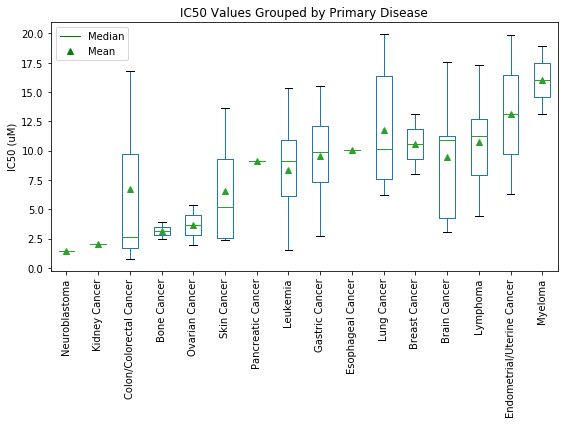

In [131]:
# Group IC50 values by primary disease and sort by median
# Still need to figure out how this code works!!!
final_group = pd.DataFrame({col:vals['IC50'] for col, vals in final.groupby('Primary Disease')})
medians = final_group.median().sort_values()
final_sorted = final_group[medians.index]

# Create boxplot for median sorted IC50 values grouped by primary disease
final_sorted.boxplot(
    rot=90,
    grid=False,
    figsize=(8, 6),
    showmeans=True
)
plt.suptitle('') # Get rid of automatically-generated boxplot title
plt.title('IC50 Values Grouped by Primary Disease')
plt.ylabel('IC50 (uM)')

# Create empty line plots to add wanted properties to legend
plt.plot([], [], label='Median', color='green', linewidth=1)
plt.plot([], [], label='Mean', marker='^', color='green', linestyle='None')
plt.legend()

# Show subplots
plt.tight_layout()
plt.show()

3. Does pyrimethamine sensitivity correlate with individual gene expression?

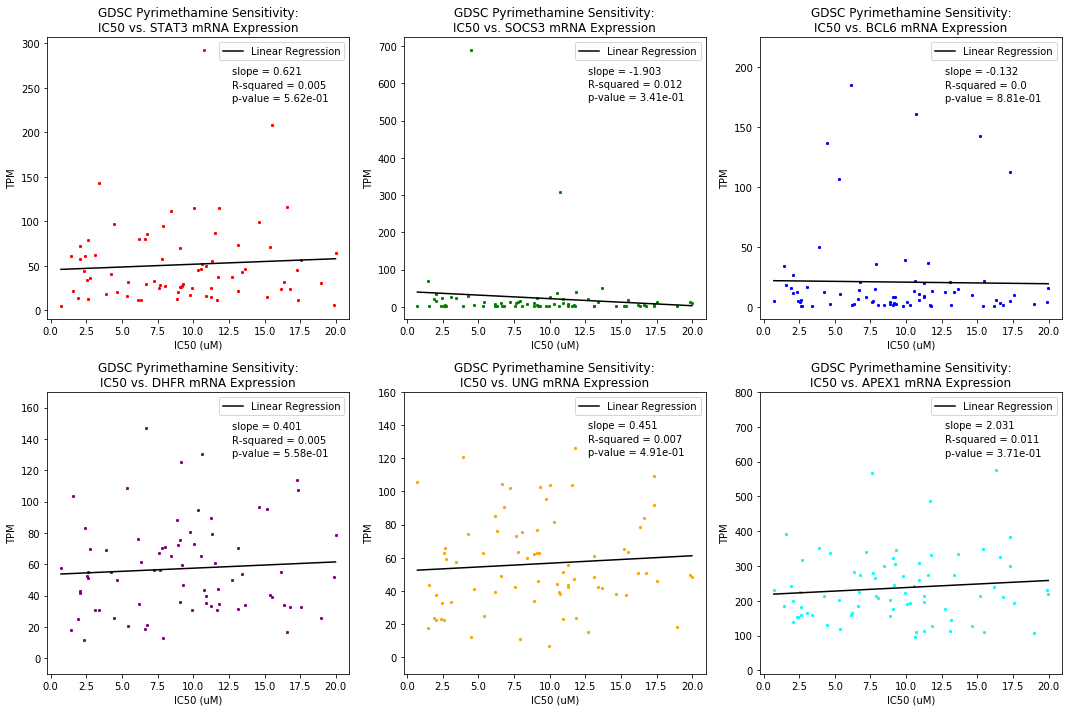

In [238]:
# Correlation between IC50 values and expression of STAT3, SOCS3, DHFR, BCL6, UNG, and APEX1
# Define figure dimensions
plt.figure(figsize=(15, 10))

# Define subplots and plot IC50 vs. gene expression
plt.subplot(2, 3, 1)
plt.scatter(
    x=final['IC50'],
    y=2 ** final['STAT3'],
    color='red',
    marker='x', s=5,
    label=None
)

plt.title('GDSC Pyrimethamine Sensitivity:\nIC50 vs. STAT3 mRNA Expression')
plt.xlabel('IC50 (uM)')
plt.ylabel('TPM')

# Add best fit line, R-squared, and p-value for linear regression to IC50 vs. STAT3 plot
slope, intercept, r_value, p_value, st_err = stats.linregress(final['IC50'], 2 ** final['STAT3'])
r_square = r_value ** 2
line = slope * final['IC50'] + intercept
plt.plot(final['IC50'], line, '-', color='black', label='Linear Regression')
plt.legend()
plt.text(12.7, 265, 'slope = ' + str(round(slope, 3)))
plt.text(12.7, 250, 'R-squared = ' + str(round(r_square, 3)))
plt.text(12.7, 235, 'p-value = ' + format(p_value, '.2e'))

plt.subplot(2, 3, 2)
plt.scatter(
    x=final['IC50'],
    y=2 ** final['SOCS3'],
    color='green',
    marker='x', s=5,
    label=None
)

plt.title('GDSC Pyrimethamine Sensitivity:\nIC50 vs. SOCS3 mRNA Expression')
plt.xlabel('IC50 (uM)')
plt.ylabel('TPM')

# Add best fit line, R-squared, and p-value for linear regression to IC50 vs. SOCS3 plot
slope, intercept, r_value, p_value, st_err = stats.linregress(final['IC50'], 2 ** final['SOCS3'])
r_square = r_value ** 2
line = slope * final['IC50'] + intercept
plt.plot(final['IC50'], line, '-', color='black', label='Linear Regression')
plt.legend()
plt.text(12.7, 625, 'slope = ' + str(round(slope, 3)))
plt.text(12.7, 590, 'R-squared = ' + str(round(r_square, 3)))
plt.text(12.7, 555, 'p-value = ' + format(p_value, '.2e'))

plt.subplot(2, 3, 3)
plt.scatter(
    x=final['IC50'],
    y=2 ** final['BCL6'],
    color='blue',
    marker='x', s=5,
    label=None
)

plt.title('GDSC Pyrimethamine Sensitivity:\nIC50 vs. BCL6 mRNA Expression')
plt.xlabel('IC50 (uM)')
plt.ylabel('TPM')
plt.ylim(-10, 225)

# Add best fit line, R-squared, and p-value for linear regression to IC50 vs. BCL6 plot
slope, intercept, r_value, p_value, st_err = stats.linregress(final['IC50'], 2 ** final['BCL6'])
r_square = r_value ** 2
line = slope * final['IC50'] + intercept
plt.plot(final['IC50'], line, '-', color='black', label='Linear Regression')
plt.legend()
plt.text(12.7, 194, 'slope = ' + str(round(slope, 3)))
plt.text(12.7, 183, 'R-squared = ' + str(round(r_square, 3)))
plt.text(12.7, 172, 'p-value = ' + format(p_value, '.2e'))

plt.subplot(2, 3, 4)
plt.scatter(
    x=final['IC50'],
    y=2 ** final['DHFR'],
    color='purple',
    marker='x', s=5,
    label=None
)

plt.title('GDSC Pyrimethamine Sensitivity:\nIC50 vs. DHFR mRNA Expression')
plt.xlabel('IC50 (uM)')
plt.ylabel('TPM')
plt.ylim(-10, 170)

# Add best fit line, R-squared, and p-value for linear regression to IC50 vs. DHFR plot
slope, intercept, r_value, p_value, st_err = stats.linregress(final['IC50'], 2 ** final['DHFR'])
r_square = r_value ** 2
line = slope * final['IC50'] + intercept
plt.plot(final['IC50'], line, '-', color='black', label='Linear Regression')
plt.legend()
plt.text(12.7, 146, 'slope = ' + str(round(slope, 3)))
plt.text(12.7, 137, 'R-squared = ' + str(round(r_square, 3)))
plt.text(12.7, 129, 'p-value = ' + format(p_value, '.2e'))

plt.subplot(2, 3, 5)
plt.scatter(
    x=final['IC50'],
    y=2 ** final['UNG'],
    color='orange',
    marker='x', s=5,
    label=None
)

plt.title('GDSC Pyrimethamine Sensitivity:\nIC50 vs. UNG mRNA Expression')
plt.xlabel('IC50 (uM)')
plt.ylabel('TPM')
plt.ylim(-10, 160)

# Add best fit line, R-squared, and p-value for linear regression to IC50 vs. UNG plot
slope, intercept, r_value, p_value, st_err = stats.linregress(final['IC50'], 2 ** final['UNG'])
r_square = r_value ** 2
line = slope * final['IC50'] + intercept
plt.plot(final['IC50'], line, '-', color='black', label='Linear Regression')
plt.legend()
plt.text(12.7, 138, 'slope = ' + str(round(slope, 3)))
plt.text(12.7, 130, 'R-squared = ' + str(round(r_square, 3)))
plt.text(12.7, 122, 'p-value = ' + format(p_value, '.2e'))

plt.subplot(2, 3, 6)
plt.scatter(
    x=final['IC50'],
    y=2 ** final['APEX1'],
    color='cyan',
    marker='x', s=5,
    label=None
)

plt.title('GDSC Pyrimethamine Sensitivity:\nIC50 vs. APEX1 mRNA Expression')
plt.xlabel('IC50 (uM)')
plt.ylabel('TPM')
plt.ylim(-10, 800)

# Add best fit line, R-squared, and p-value for linear regression to IC50 vs. APEX1 plot
slope, intercept, r_value, p_value, st_err = stats.linregress(final['IC50'], 2 ** final['APEX1'])
r_square = r_value ** 2
line = slope * final['IC50'] + intercept
plt.plot(final['IC50'], line, '-', color='black', label='Linear Regression')
plt.legend()
plt.text(12.7, 695, 'slope = ' + str(round(slope, 3)))
plt.text(12.7, 655, 'R-squared = ' + str(round(r_square, 3)))
plt.text(12.7, 615, 'p-value = ' + format(p_value, '.2e'))

# Show plots
plt.tight_layout()
plt.show()

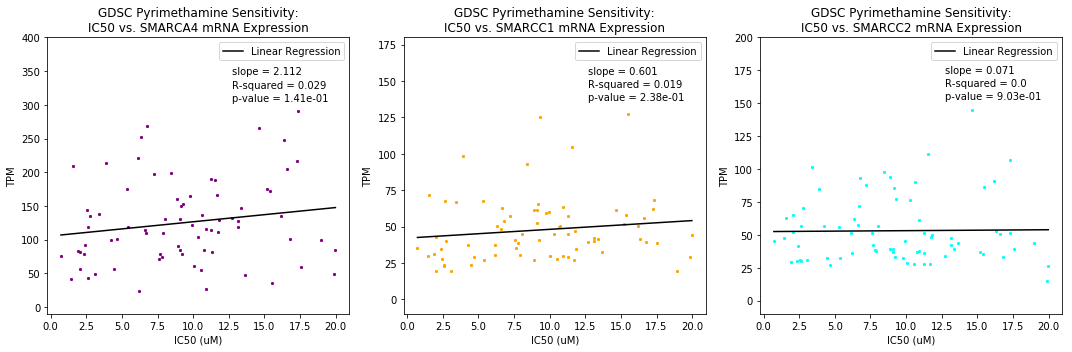

In [256]:
# Correlation between IC50 values and expression of SMARCA4, SMARCC1, and SMARCC2
# Define figure dimensions
plt.figure(figsize=(15, 5))

# Define subplots and plot IC50 vs. gene expression
plt.subplot(1, 3, 1)
plt.scatter(
    x=final['IC50'],
    y=2 ** final['SMARCA4'],
    color='purple',
    marker='x', s=5,
    label=None
)

plt.title('GDSC Pyrimethamine Sensitivity:\nIC50 vs. SMARCA4 mRNA Expression')
plt.xlabel('IC50 (uM)')
plt.ylabel('TPM')
plt.ylim(-10, 400)

# Add best fit line, R-squared, and p-value for linear regression to IC50 vs. SMARCA4 plot
slope, intercept, r_value, p_value, st_err = stats.linregress(final['IC50'], 2 ** final['SMARCA4'])
r_square = r_value ** 2
line = slope * final['IC50'] + intercept
plt.plot(final['IC50'], line, '-', color='black', label='Linear Regression')
plt.legend()
plt.text(12.7, 345, 'slope = ' + str(round(slope, 3)))
plt.text(12.7, 325, 'R-squared = ' + str(round(r_square, 3)))
plt.text(12.7, 305, 'p-value = ' + format(p_value, '.2e'))

plt.subplot(1, 3, 2)
plt.scatter(
    x=final['IC50'],
    y=2 ** final['SMARCC1'],
    color='orange',
    marker='x', s=5,
    label=None
)

plt.title('GDSC Pyrimethamine Sensitivity:\nIC50 vs. SMARCC1 mRNA Expression')
plt.xlabel('IC50 (uM)')
plt.ylabel('TPM')
plt.ylim(-10, 180)

# Add best fit line, R-squared, and p-value for linear regression to IC50 vs. SMARCC1 plot
slope, intercept, r_value, p_value, st_err = stats.linregress(final['IC50'], 2 ** final['SMARCC1'])
r_square = r_value ** 2
line = slope * final['IC50'] + intercept
plt.plot(final['IC50'], line, '-', color='black', label='Linear Regression')
plt.legend()
plt.text(12.7, 155, 'slope = ' + str(round(slope, 3)))
plt.text(12.7, 146, 'R-squared = ' + str(round(r_square, 3)))
plt.text(12.7, 137, 'p-value = ' + format(p_value, '.2e'))

plt.subplot(1, 3, 3)
plt.scatter(
    x=final['IC50'],
    y=2 ** final['SMARCC2'],
    color='cyan',
    marker='x', s=5,
    label=None
)

plt.title('GDSC Pyrimethamine Sensitivity:\nIC50 vs. SMARCC2 mRNA Expression')
plt.xlabel('IC50 (uM)')
plt.ylabel('TPM')
plt.ylim(-10, 200)

# Add best fit line, R-squared, and p-value for linear regression to IC50 vs. SMARCC2 plot
slope, intercept, r_value, p_value, st_err = stats.linregress(final['IC50'], 2 ** final['SMARCC2'])
r_square = r_value ** 2
line = slope * final['IC50'] + intercept
plt.plot(final['IC50'], line, '-', color='black', label='Linear Regression')
plt.legend()
plt.text(12.7, 173, 'slope = ' + str(round(slope, 3)))
plt.text(12.7, 163, 'R-squared = ' + str(round(r_square, 3)))
plt.text(12.7, 153, 'p-value = ' + format(p_value, '.2e'))

# Show plots
plt.tight_layout()
plt.show()

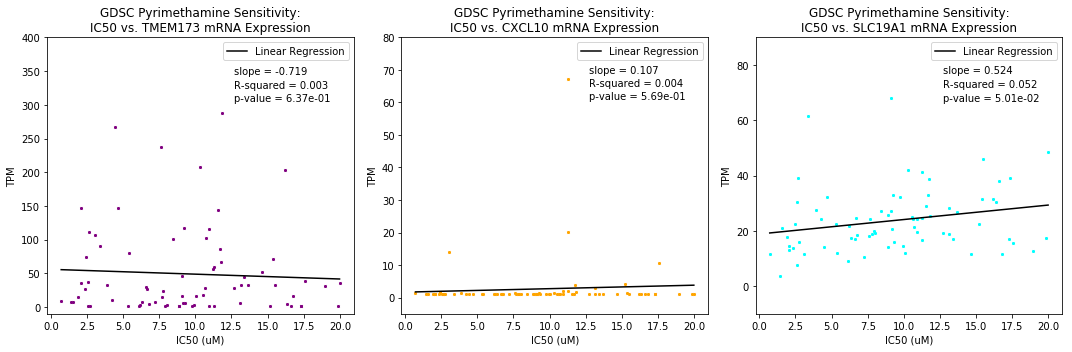

In [274]:
# Correlation between IC50 values and expression of TMEM173, CXCL10, and SLC19A1
# Define figure dimensions
plt.figure(figsize=(15, 5))

# Define subplots and plot IC50 vs. gene expression
plt.subplot(1, 3, 1)
plt.scatter(
    x=final['IC50'],
    y=2 ** final['TMEM173'],
    color='purple',
    marker='x', s=5,
    label=None
)

plt.title('GDSC Pyrimethamine Sensitivity:\nIC50 vs. TMEM173 mRNA Expression')
plt.xlabel('IC50 (uM)')
plt.ylabel('TPM')
plt.ylim(-10, 400)

# Add best fit line, R-squared, and p-value for linear regression to IC50 vs. TMEM173 plot
slope, intercept, r_value, p_value, st_err = stats.linregress(final['IC50'], 2 ** final['TMEM173'])
r_square = r_value ** 2
line = slope * final['IC50'] + intercept
plt.plot(final['IC50'], line, '-', color='black', label='Linear Regression')
plt.legend()
plt.text(12.7, 345, 'slope = ' + str(round(slope, 3)))
plt.text(12.7, 325, 'R-squared = ' + str(round(r_square, 3)))
plt.text(12.7, 305, 'p-value = ' + format(p_value, '.2e'))

plt.subplot(1, 3, 2)
plt.scatter(
    x=final['IC50'],
    y=2 ** final['CXCL10'],
    color='orange',
    marker='x', s=5,
    label=None
)

plt.title('GDSC Pyrimethamine Sensitivity:\nIC50 vs. CXCL10 mRNA Expression')
plt.xlabel('IC50 (uM)')
plt.ylabel('TPM')
plt.ylim(-5, 80)

# Add best fit line, R-squared, and p-value for linear regression to IC50 vs. CXCL10 plot
slope, intercept, r_value, p_value, st_err = stats.linregress(final['IC50'], 2 ** final['CXCL10'])
r_square = r_value ** 2
line = slope * final['IC50'] + intercept
plt.plot(final['IC50'], line, '-', color='black', label='Linear Regression')
plt.legend()
plt.text(12.7, 69, 'slope = ' + str(round(slope, 3)))
plt.text(12.7, 65, 'R-squared = ' + str(round(r_square, 3)))
plt.text(12.7, 61, 'p-value = ' + format(p_value, '.2e'))

plt.subplot(1, 3, 3)
plt.scatter(
    x=final['IC50'],
    y=2 ** final['SLC19A1'],
    color='cyan',
    marker='x', s=5,
    label=None
)

plt.title('GDSC Pyrimethamine Sensitivity:\nIC50 vs. SLC19A1 mRNA Expression')
plt.xlabel('IC50 (uM)')
plt.ylabel('TPM')
plt.ylim(-10, 90)

# Add best fit line, R-squared, and p-value for linear regression to IC50 vs. SLC19A1 plot
slope, intercept, r_value, p_value, st_err = stats.linregress(final['IC50'], 2 ** final['SLC19A1'])
r_square = r_value ** 2
line = slope * final['IC50'] + intercept
plt.plot(final['IC50'], line, '-', color='black', label='Linear Regression')
plt.legend()
plt.text(12.7, 77, 'slope = ' + str(round(slope, 3)))
plt.text(12.7, 72, 'R-squared = ' + str(round(r_square, 3)))
plt.text(12.7, 67, 'p-value = ' + format(p_value, '.2e'))

# Show plots
plt.tight_layout()
plt.show()